In [1]:
import matplotlib.pyplot as plt
import pandas

/Users/rushikeshraut/work/stock/env/lib/python3.8/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
def get_data(sector_name):
    df = pandas.read_csv(f'History/{sector_name}_Data.csv')
    df = df.drop(columns=["Open", "High", "Low"])
    n = 4000
    df = df.head(n=n) # 2004-5
    #df = df.head(n=60)
    df['Date'] = df['Date'].astype('datetime64')
    size = len(df['Close']) - 1
    first = df['Close'][n-1]
    df['Close'] = df['Close']*100/first
    df = df.rename(columns={"Close": sector_name})
    return df

In [3]:
# list_of_sectors = ['NIFTY50', 'NIFTYBank', 'NIFTYAuto', 'NIFTYIT', 'NIFTYFMCG', 'NIFTYPharma', 'NIFTYPrivateBank']

list_of_sectors = ['NIFTY50', 'NIFTYBank', 'NIFTYSmallcap100', 'NIFTYMidcap100', 'NIFTYAuto', 'NIFTYFMCG']
list_of_sectors = ['NIFTY50', 'NIFTYNext50','NIFTYSmallcap100', 'NIFTYMidcap100',]

# list_of_sectors = ['NIFTY50', 'NIFTYNext50','NIFTY100', 'NIFTY200', 'NIFTY500']


In [4]:
p_df = None
for sector in list_of_sectors:
    df = get_data(sector)
    if p_df is None:
        p_df = df
    for column in df.columns:
        if column != 'Date':
            p_df[column] = df[column]

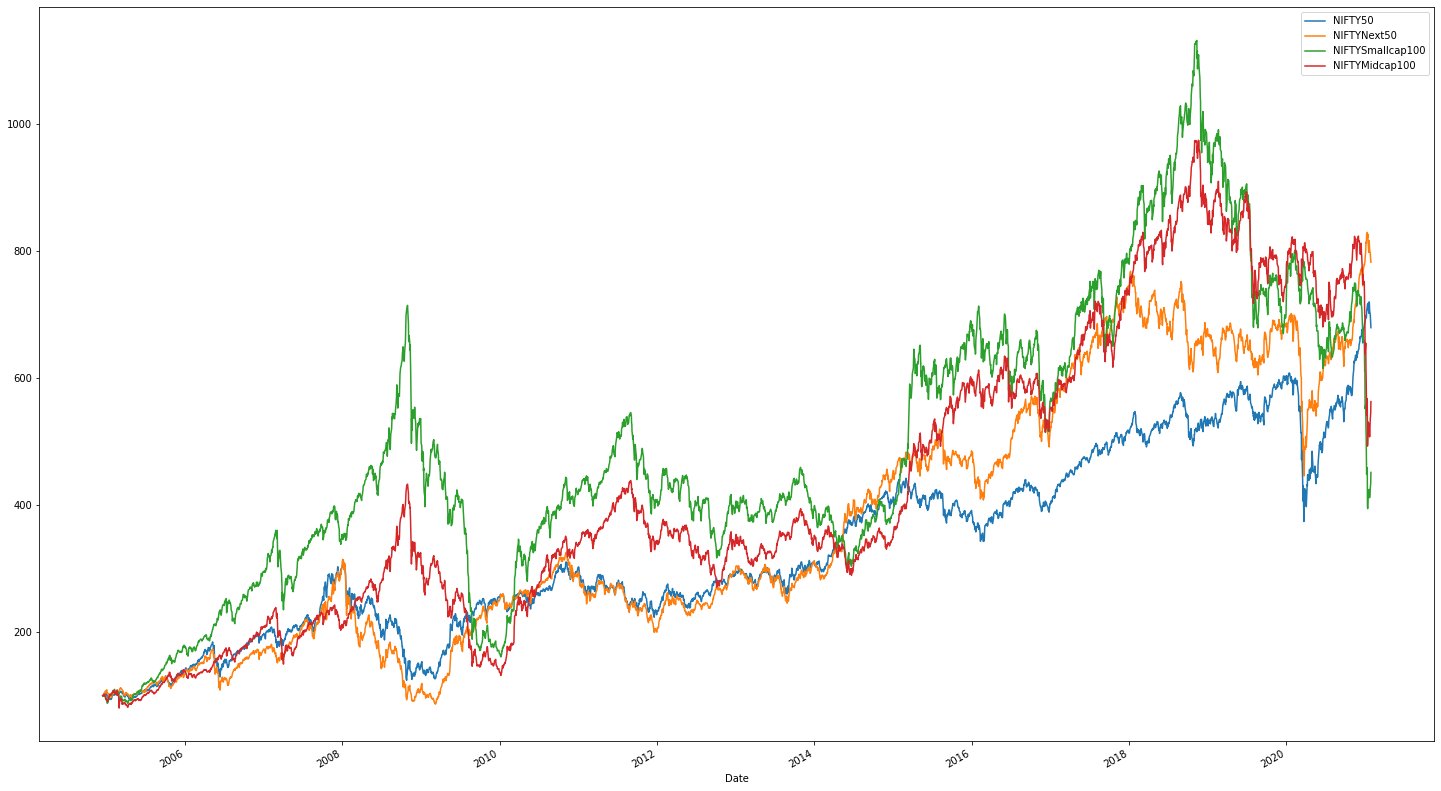

In [5]:
p_df.plot(x='Date', y=[column for column in p_df.columns[1:]], figsize=(25,15))

In [7]:
p_df

,Date,NIFTY50,NIFTYNext50,NIFTYSmallcap100,NIFTYMidcap100
0,2021-01-28,679.596203,782.692794,451.657312,563.134190
1,2021-01-27,686.971277,785.800604,434.794682,544.744350
2,2021-01-25,700.319693,796.342124,427.131462,535.144580
3,2021-01-22,706.861106,802.569781,411.905465,507.655144
4,2021-01-21,717.605253,809.199456,418.387001,514.572362
...,...,...,...,...,...
3995,2004-12-22,100.105745,102.166560,101.110783,102.253255
3996,2004-12-21,100.563152,102.168968,100.144165,100.776953
3997,2004-12-20,99.687684,101.107353,99.458789,99.884264
3998,2004-12-17,98.962227,100.240729,100.142984,100.485372


In [6]:
p_df.std()

NIFTY50             143.585810
NIFTYNext50         203.475653
NIFTYSmallcap100    224.232640
NIFTYMidcap100      234.030823
dtype: float64